# Dataset - dutch weather + air_quality

## Installing packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mode
import collections
from datetime import date
import scipy.stats as stats

## Importing data

In [12]:
air_quality = pd.read_csv(r'C:\Users\claud\data_final_project\air_quality.csv')
weather = pd.read_csv(r'C:\Users\claud\data_final_project\dutchweather2.csv')

In [13]:
air_quality.head()

,date,pm25,pm10,o3,no2,co,no2index,pm10index,o3index,pm25index
0,20131231,0.0,0.0,0.0,30.0,0.0,very low,zero,zero,zero
1,20140101,0.0,42.0,0.0,32.0,0.0,very low,low,zero,zero
2,20140102,0.0,14.0,0.0,28.0,0.0,very low,very low,zero,zero
3,20140103,0.0,17.0,0.0,26.0,0.0,very low,very low,zero,zero
4,20140104,0.0,19.0,0.0,28.0,0.0,very low,very low,zero,zero


In [14]:
weather.head()

,date,ddvec,fhvec,fg,tg,q,dr,rh,pg,ng,ug,ev24,rain,rainy
0,20131231,167,72,73,66,179,53,40,10103,8.0,83,2,1,1
1,20140101,168,78,80,68,182,45,28,10020,7.0,89,2,1,1
2,20140102,191,62,70,83,193,20,16,9971,5.0,88,3,1,1
3,20140103,199,91,97,85,167,33,33,9993,6.0,86,2,1,1
4,20140104,169,64,69,76,182,5,4,9985,7.0,86,2,1,1


- Merging the tables

In [15]:
weather = weather.set_index('date')
air_quality = air_quality.set_index('date')

In [16]:
data = pd.concat([weather, air_quality], axis=1)
data

,ddvec,fhvec,fg,tg,q,dr,rh,pg,ng,ug,...,rainy,pm25,pm10,o3,no2,co,no2index,pm10index,o3index,pm25index
date,,,,,,,,,,,,,,,,,,,,,
20131231,167,72,73,66,179,53,40,10103,8.0,83,...,1,0.0,0.0,0.0,30.0,0.0,very low,zero,zero,zero
20140101,168,78,80,68,182,45,28,10020,7.0,89,...,1,0.0,42.0,0.0,32.0,0.0,very low,low,zero,zero
20140102,191,62,70,83,193,20,16,9971,5.0,88,...,1,0.0,14.0,0.0,28.0,0.0,very low,very low,zero,zero
20140103,199,91,97,85,167,33,33,9993,6.0,86,...,1,0.0,17.0,0.0,26.0,0.0,very low,very low,zero,zero
20140104,169,64,69,76,182,5,4,9985,7.0,86,...,1,0.0,19.0,0.0,28.0,0.0,very low,very low,zero,zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211113,265,9,25,113,307,44,78,10116,8.0,93,...,1,0.0,22.0,9.0,12.0,3.0,very low,very low,very low,zero
20211114,64,32,33,99,202,0,-1,10237,8.0,91,...,1,0.0,22.0,15.0,13.0,3.0,very low,very low,very low,zero
20211115,63,31,33,67,63,0,0,10268,8.0,89,...,1,0.0,25.0,13.0,16.0,3.0,very low,low,very low,zero


In [17]:
data.dtypes

ddvec          int64
fhvec          int64
fg             int64
tg             int64
q              int64
dr             int64
rh             int64
pg             int64
ng           float64
ug             int64
ev24           int64
rain           int64
rainy          int64
pm25         float64
pm10         float64
o3           float64
no2          float64
co           float64
no2index      object
pm10index     object
o3index       object
pm25index     object
dtype: object

In [18]:
data.isna().sum()

ddvec          0
fhvec          0
fg             0
tg             0
q              0
dr             0
rh             0
pg             0
ng             0
ug             0
ev24           0
rain           0
rainy          0
pm25         213
pm10         213
o3           213
no2          213
co           213
no2index     213
pm10index    213
o3index      213
pm25index    213
dtype: int64

- Here above we can see the date missing values from the air_quality dataset

- Filling NaNs

In [ ]:
data = data.replace(np.nan, 0)

In [ ]:
data.isna().sum()

In [20]:
summary = data.describe().T
# iqr -> inter quartile range
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round) # lambda x: round(x, 2)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
ddvec,2879.0,194.0,91.0,1.0,127.0,211.0,258.0,360.0,131.0
fhvec,2879.0,43.0,23.0,2.0,26.0,39.0,56.0,142.0,30.0
fg,2879.0,49.0,22.0,10.0,33.0,45.0,61.0,146.0,28.0
tg,2879.0,113.0,59.0,-66.0,67.0,112.0,161.0,295.0,94.0
q,2879.0,1092.0,813.0,31.0,346.0,932.0,1700.0,3108.0,1354.0
dr,2879.0,17.0,28.0,0.0,0.0,2.0,25.0,224.0,25.0
rh,2879.0,23.0,47.0,-1.0,0.0,1.0,25.0,672.0,25.0
pg,2879.0,10152.0,99.0,9757.0,10095.0,10160.0,10217.0,10464.0,122.0
ng,2879.0,6.0,2.0,0.0,5.0,6.0,8.0,8.0,3.0
ug,2879.0,80.0,10.0,36.0,74.0,81.0,87.0,99.0,13.0


In [21]:
corr_data = data.select_dtypes([np.number])
correlations_matrix = corr_data.corr()
correlations_matrix

,ddvec,fhvec,fg,tg,q,dr,rh,pg,ng,ug,ev24,rain,rainy,pm25,pm10,o3,no2,co
ddvec,1.000000,0.107347,0.154639,0.034090,-0.071949,0.129662,0.108147,-0.063849,0.223882,0.147160,-0.069526,0.290877,0.248048,-0.192462,-0.214434,0.005802,-0.101457,-0.120809
fhvec,0.107347,1.000000,0.966034,-0.151493,-0.267376,0.279877,0.189099,-0.313703,0.214951,-0.024241,-0.270991,0.295134,0.223296,-0.153766,-0.240886,-0.045597,-0.322741,-0.217785
fg,0.154639,0.966034,1.000000,-0.129420,-0.276764,0.359538,0.271145,-0.395916,0.250582,-0.010277,-0.273782,0.363606,0.260984,-0.175214,-0.272801,-0.024027,-0.336349,-0.231513
tg,0.034090,-0.151493,-0.129420,1.000000,0.628450,-0.143304,0.022297,0.001009,-0.137322,-0.385031,0.715516,-0.123625,-0.156470,-0.178214,-0.085126,0.507875,-0.126033,-0.073688
q,-0.071949,-0.267376,-0.276764,0.628450,1.000000,-0.398382,-0.217683,0.223562,-0.548870,-0.745986,0.987163,-0.414601,-0.290591,-0.104689,-0.001438,0.589543,-0.011568,-0.037310
dr,0.129662,0.279877,0.359538,-0.143304,-0.398382,1.000000,0.735884,-0.457651,0.376472,0.396820,-0.374712,0.472415,0.288360,-0.100254,-0.232938,-0.095425,-0.134612,-0.082125
rh,0.108147,0.189099,0.271145,0.022297,-0.217683,0.735884,1.000000,-0.367269,0.257220,0.258636,-0.195568,0.372578,0.223671,-0.119779,-0.199133,-0.022797,-0.123907,-0.073393
pg,-0.063849,-0.313703,-0.395916,0.001009,0.223562,-0.457651,-0.367269,1.000000,-0.312199,-0.186088,0.191668,-0.431546,-0.298171,0.164280,0.229071,0.035060,0.120888,0.112585
ng,0.223882,0.214951,0.250582,-0.137322,-0.548870,0.376472,0.257220,-0.312199,1.000000,0.487471,-0.512386,0.486022,0.296640,0.014726,-0.184725,-0.246407,-0.262338,0.002935
ug,0.147160,-0.024241,-0.010277,-0.385031,-0.745986,0.396820,0.258636,-0.186088,0.487471,1.000000,-0.719995,0.380090,0.293229,0.081614,-0.012423,-0.532141,0.040336,-0.018676


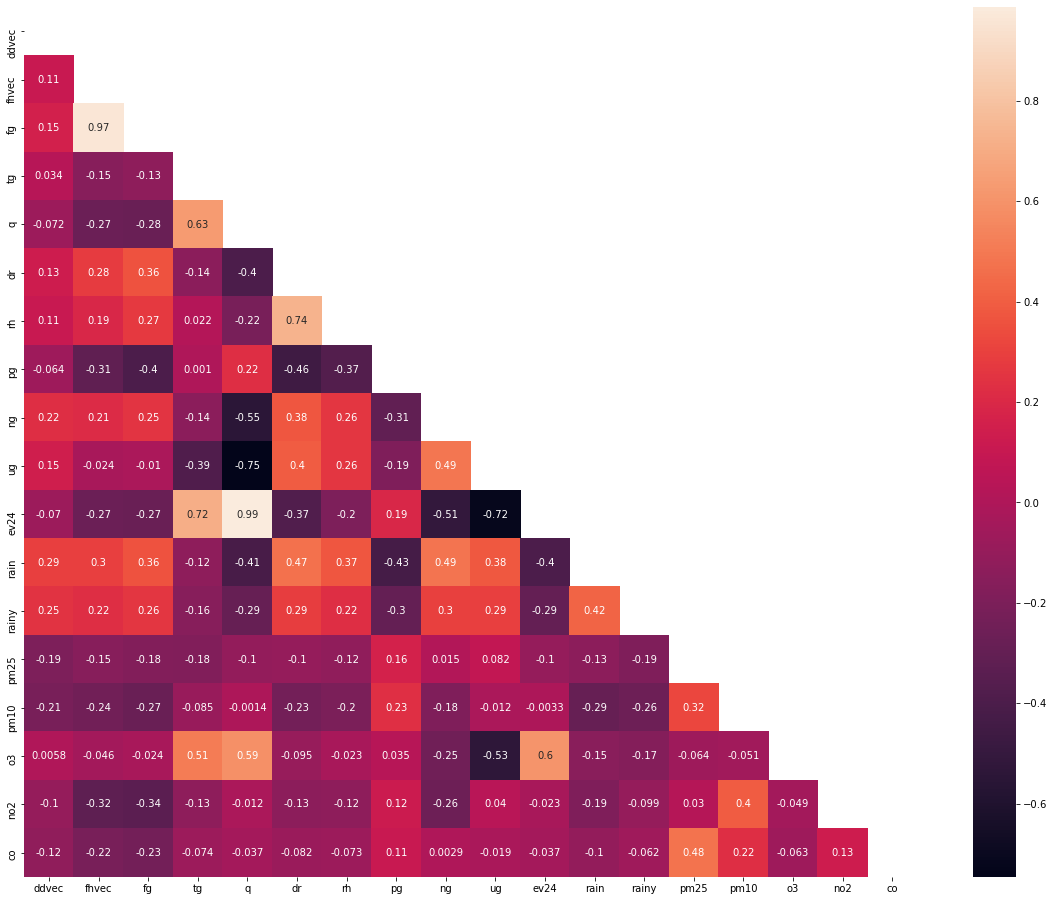

In [22]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)#change annot to False to hide the text, as it's unreadable
plt.show()

In [23]:
corr_data[(corr_data['o3'] > 0.8) | (corr_data['o3'] < -0.8)][['o3', 'ddvec']] # filtering for some analysis

,o3,ddvec
date,,
20140129,1.0,90
20140130,6.0,81
20140131,23.0,154
20140201,19.0,185
20140202,10.0,184
...,...,...
20211111,9.0,177
20211112,15.0,171
20211113,9.0,265
